In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
from functions import *
import warnings
warnings.filterwarnings('ignore')

# todo limit to vulnerable tracts and cluster. we want to understand what distinguishes tracts that DO gentrify from tracts that dont, aka early warning signs

In [54]:
df_raw = pd.read_parquet("Data/Cleaned/after_kriging.parquet")
feat = pd.read_parquet('Data/Cleaned/post_feat_engineering.parquet')
labels = pd.read_parquet('Data/Cleaned/labels_may5.parquet')

df = feat.merge(labels[['GEOID','pred_year','label']], on=['GEOID','pred_year'], how='inner')


### Clustering

In [56]:
# features = ['total_pop', 'percent_hh_income_assist', 'percent_hh_snap',
#        'percent_hh_english', 'percent_work_agriculture',
#        'percent_work_construction', 'percent_work_retail',
#        'percent_work_finance', 'percent_work_stem', 'percent_work_edu_health',
#        'percent_work_art', 'percent_out_of_county',
#        'percent_moved_within_county', 'percent_public_transit',
#        'percent_drive_commute', 'percent_bike_commute', 'percent_walk_commute',
#        'percent_wfh', 'percent_white', 'percent_black', 'percent_native',
#        'percent_asian', 'percent_pacific', 'percent_latino',
#        'percent_bachelors', 'percent_grad', 'percent_born_citizen',
#        'percent_naturalized_citizen', 'percent_not_citizen',
#        'percent_same_house_1yr', 'percent_out_of_state', 'med_income',
#        'med_rent_acs', 'med_age', 'percent_hh_rented', 'med_value',
#        'percent_hh_electric', 'percent_hh_solar', 'med_hh_age',
#        'med_hh_tenure', 'num_citibike_rides', 'num_trees', 'med_rent',
#        'num_affordable_hous_built', 'num_bikelanes',
#        'num_evictions_commercial', 'num_evictions_residential', 'park_acres',
#        'num_parks']

features = ['percent_bachelors','med_rent_acs','percent_white']

In [57]:
# c1 = df[features][df['cluster']==0].mean()
# c2 = df[features][df['cluster']==1].mean()

# pd.concat([c1,c2], axis=1)

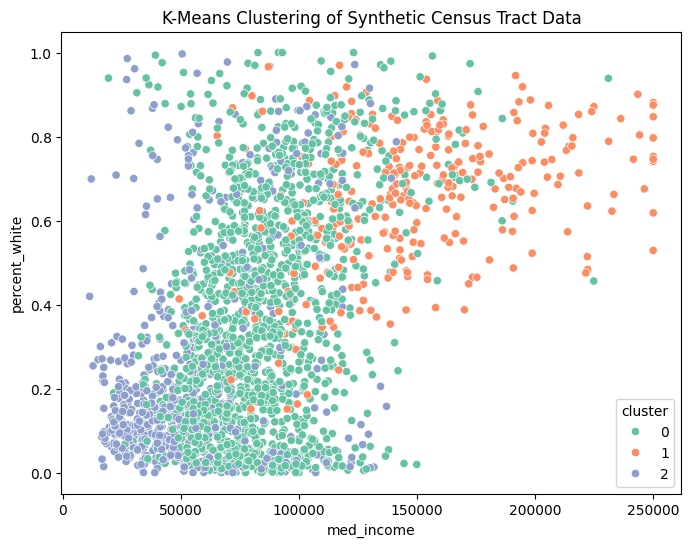

In [58]:
# # Scale your features (optional but improves clustering performance)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)

# limit data to specific year
df_raw = df_raw[df_raw.year=='2022']

# K-Means Clustering (try k=3 to start)
kmeans = KMeans(n_clusters=3, random_state=42)
df_raw['cluster'] = kmeans.fit_predict(df_raw[features])

# Visualize the clusters (just using first two variables here)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_raw, x='med_income', y='percent_white', hue='cluster', palette='Set2')
plt.title("K-Means Clustering of Synthetic Census Tract Data")
plt.show()


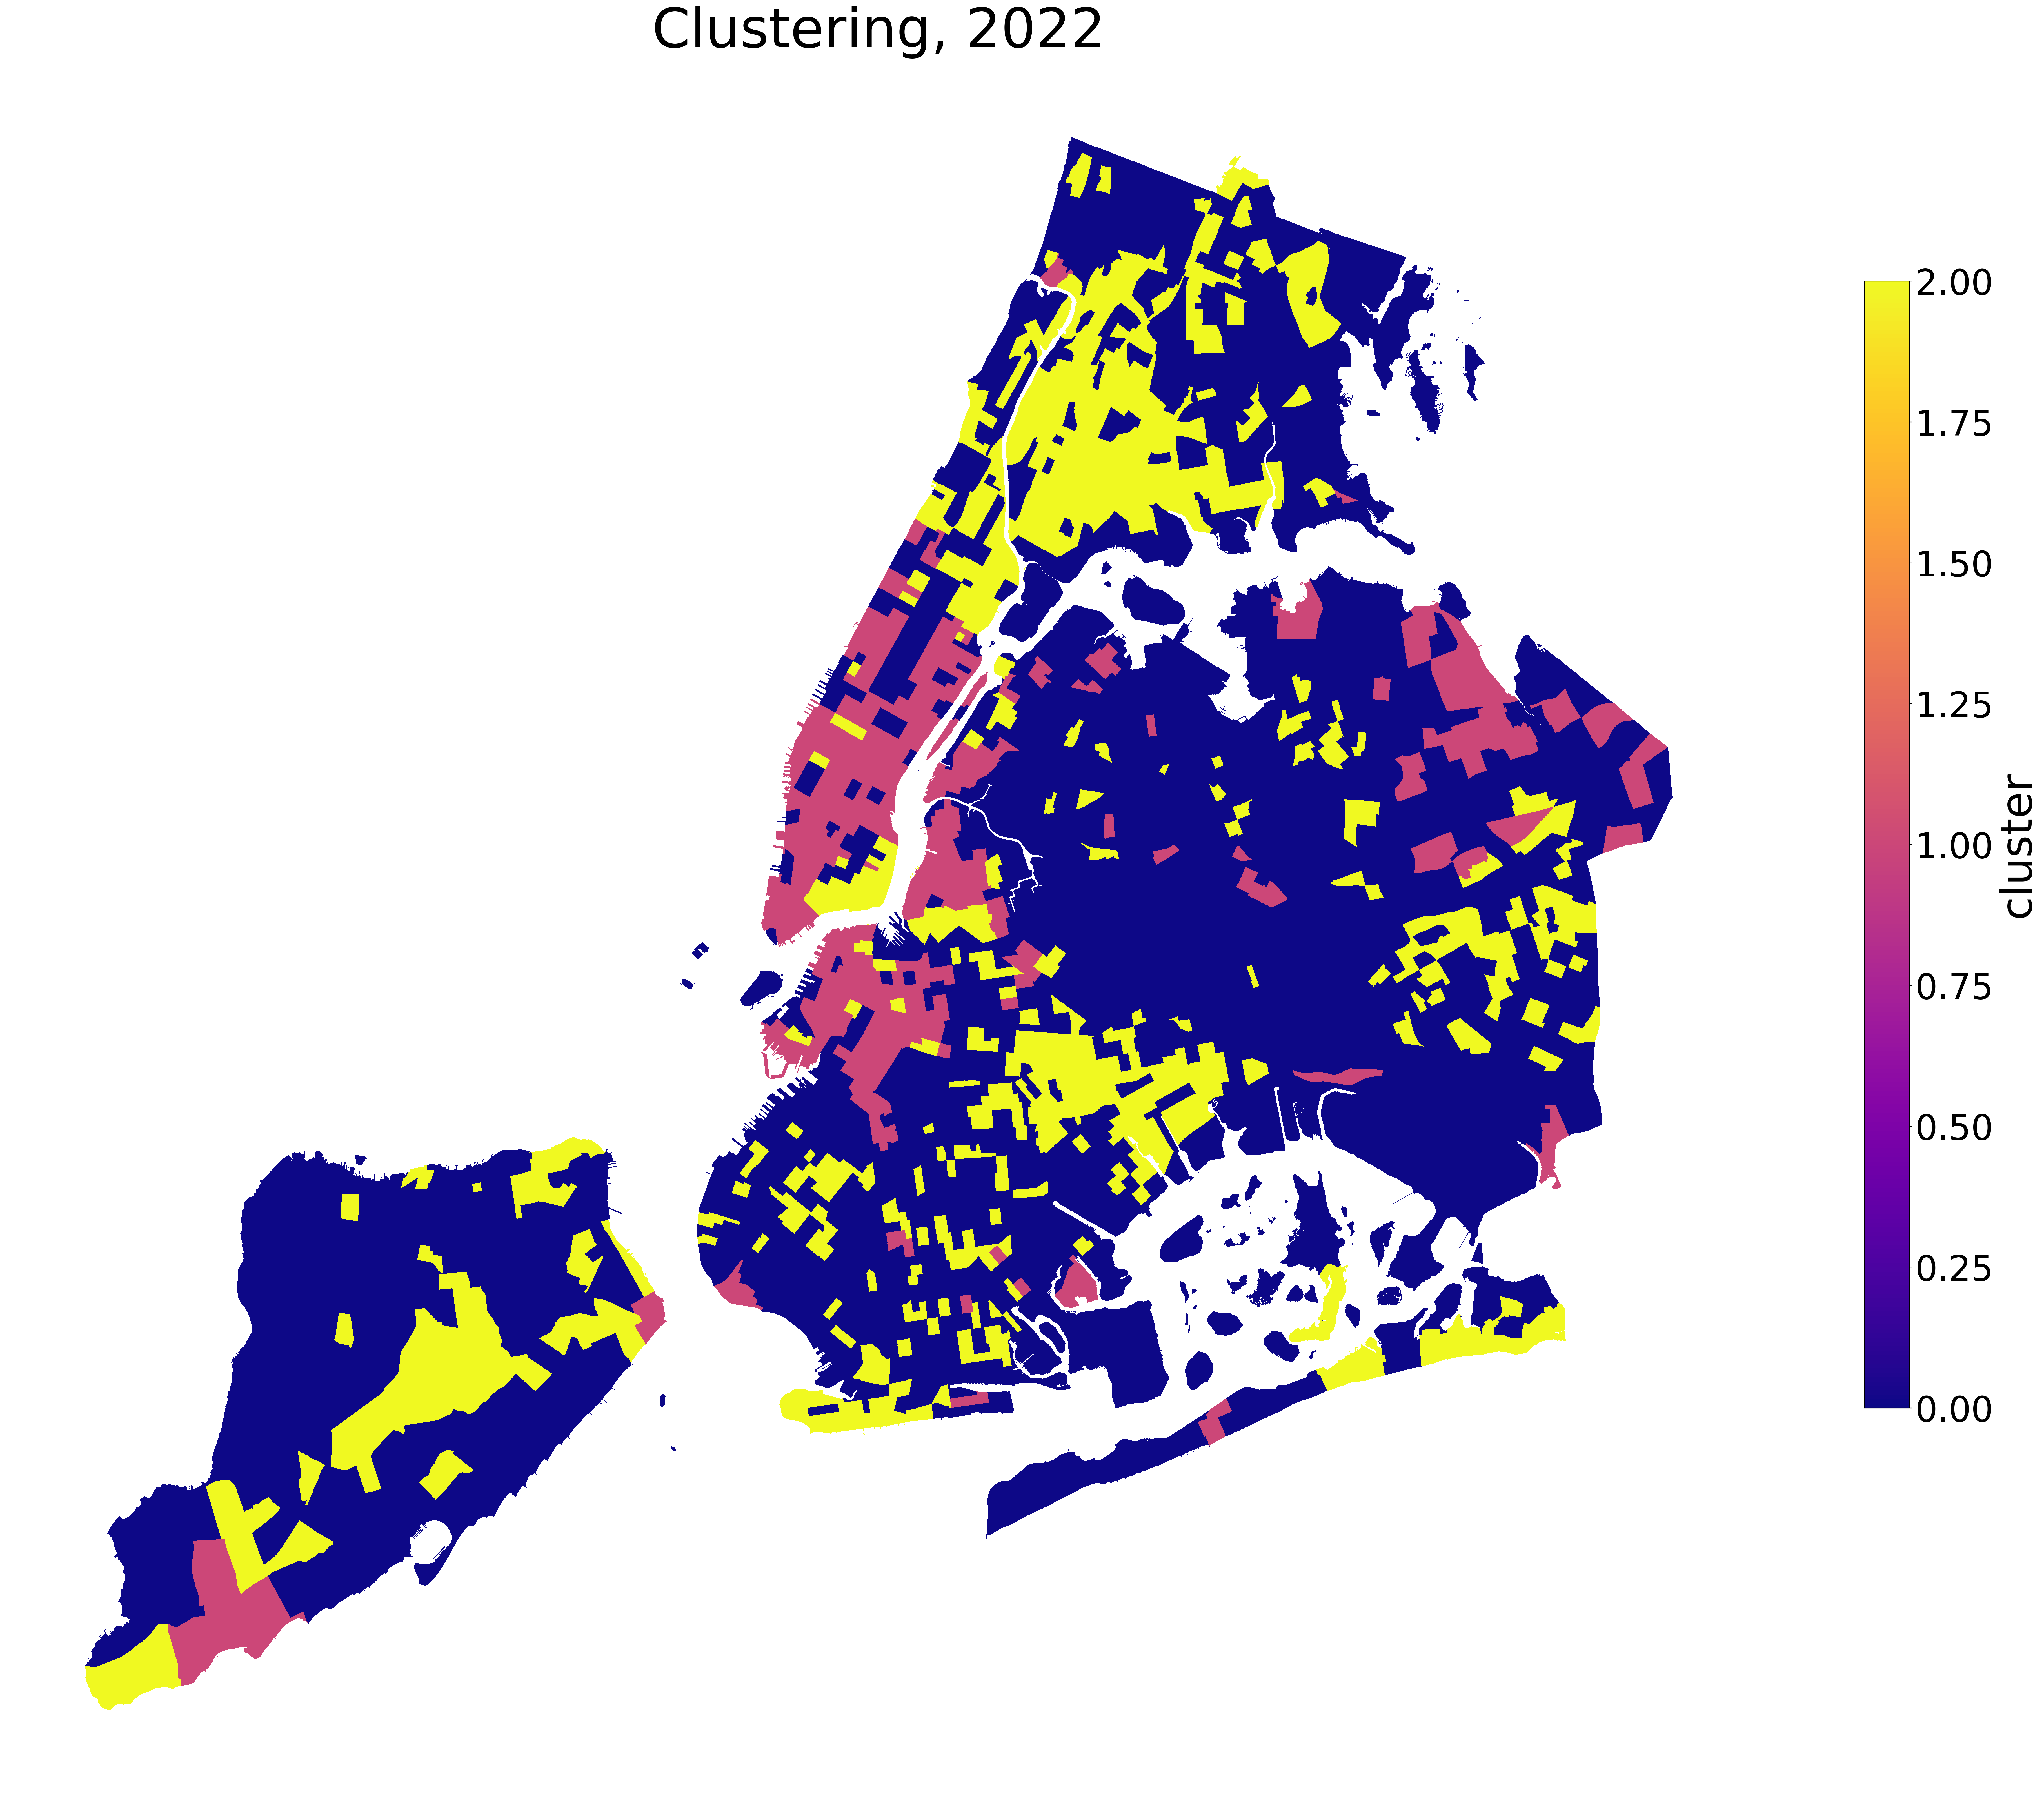

In [59]:
choropleth(df_raw, 'cluster',['2022'], cmap='plasma',title='Clustering')